In [1364]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1365]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy. stats as stats
from sklearn.metrics import mean_squared_error

In [1366]:
df = pd.read_csv(r"C:\MY FILE\MBAN 6110S-Data Science\assignment3\kc_house_data.csv")

Your task is to build a regression model which can predict the price of a house, based on the features available.

Data:
Questions / Tasks:
1. Build a regression model to predict the price of a house. You may choose between Ordinary Least Squares Regression, LASSO, Ridge or Elastic Net.

You may need to clean and transform the data, including feature engineering, creating dummy variables, or using dimensionality reduction.
Be sure to explain why you chose the approach you did, and why it's the best approach for the data provided.
2. Evaluate the model using techniques covered in class and explain the results. How do you know this is the best model you can build, given the tools you have?

3. Explain the results to a business executive. What are the main drivers of house prices in King City? And how much do these drivers impact the price?

In [1367]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [1368]:
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [1369]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


Data quality issues 
- convert datatype:  
        ' date' /''yr_built'/ 'yr_renovated' / 'zipcode'

- Remove outliers
       - Observation '15870' with 33 bedrooms and the sqft_living is only 1620, this doesnot make sense, this observation need to be removed. 

- convert to dummie variables: 'waterfront', 'view', 'grade','condition

- what is the difference between 'sqft_living15' and 'sqft_living'.


In [1370]:
# convert datatype
df['date'] = pd.to_datetime(df['date'])
#df['yr_built'] = pd.to_datetime(df['yr_built'])
#df['yr_renovated'] = pd.to_datetime(df['yr_renovated'])
df['zipcode'].astype(object)
df['waterfront'].astype(bool)
df['view'].astype(object)
df['grade'].astype(object)


0        7
1        7
2        6
3        7
4        8
        ..
21608    8
21609    8
21610    7
21611    8
21612    7
Name: grade, Length: 21613, dtype: object

In [1371]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [1372]:
# create dummie variables 
dummies_view = pd.get_dummies(df.view, prefix= 'view', dtype= int)
dummies_waterfront = pd.get_dummies(df.waterfront, prefix='wf',dtype =int)
dummies_grade = pd.get_dummies(df.grade, prefix='grade', dtype = int)
dummies_condition = pd.get_dummies(df.condition, prefix='condition', dtype= int)
df2 = pd.concat([df,dummies_view,dummies_waterfront,dummies_condition,dummies_grade], axis=1)

df2.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [1373]:
# extract year, month and create new columns 

df2['year'] = df['date'].dt.year
df2['month'] = df['date'].dt.month

In [1374]:
# drop outliers for observation with more than 30 bedrooms
df = df.drop(df[df['bedrooms'] > 30].index)

<Axes: >

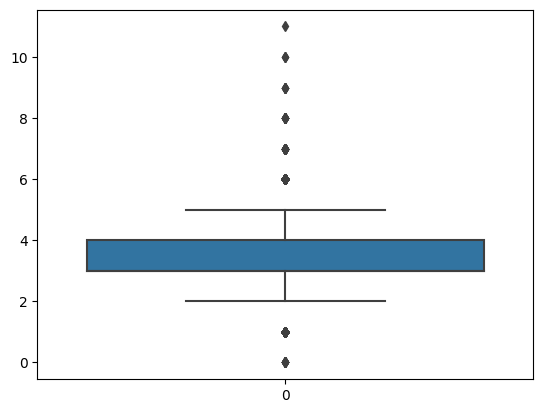

In [1375]:
sns.boxplot(df['bedrooms'])

<Axes: xlabel='waterfront', ylabel='count'>

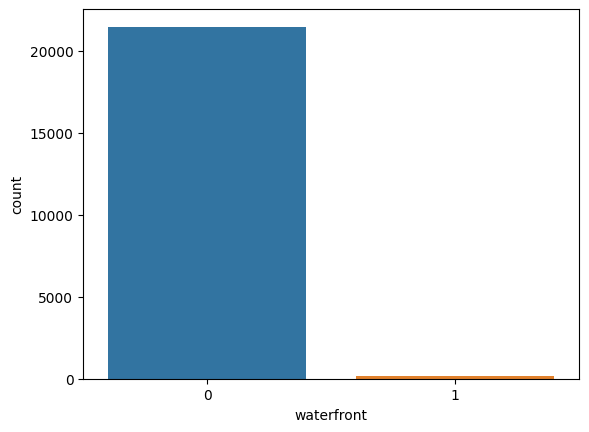

In [1376]:
sns.countplot(data = df, x='waterfront')

<Axes: xlabel='view', ylabel='count'>

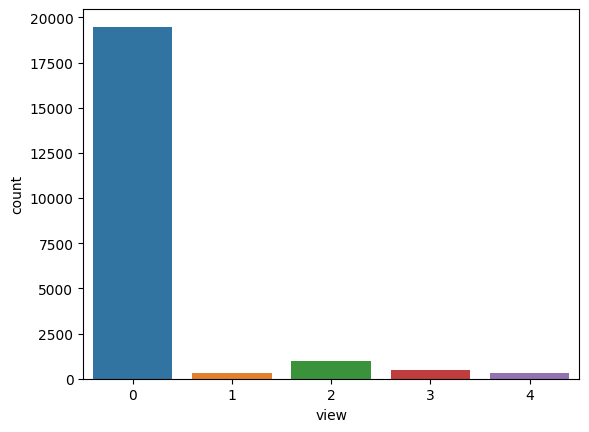

In [1377]:
sns.countplot(data = df, x = 'view')

By checking correlations , to select the variables for building models


In [1378]:
df_corr = df.corr()
df_corr
greater_than_05 = df_corr.where(df_corr > 0.5)
greater_than_05.head(21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,NaN,1.000000,NaN,0.525147,0.702047,NaN,NaN,NaN,NaN,...,0.667447,0.605591,NaN,NaN,NaN,NaN,NaN,NaN,0.585404,NaN
bedrooms,NaN,NaN,NaN,1.000000,0.529159,0.591467,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,NaN,NaN,0.525147,0.529159,1.000000,0.754663,NaN,0.500645,NaN,NaN,...,0.664979,0.685339,NaN,0.506012,NaN,NaN,NaN,NaN,0.568628,NaN
sqft_living,NaN,NaN,0.702047,0.591467,0.754663,1.000000,NaN,NaN,NaN,NaN,...,0.762701,0.876597,NaN,NaN,NaN,NaN,NaN,NaN,0.756419,NaN
sqft_lot,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.718556
floors,NaN,NaN,NaN,NaN,0.500645,NaN,NaN,1.000000,NaN,NaN,...,NaN,0.523866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


we can see, 'bedrooms' and three variables' correlation is greater than 0.6 which shows the multicolinary
- 'sqft_living' and four variables' correlation is greater than n0.6
- 'grade' and three variables' correlation is greater than 0.6
- ' sqft_above' and four variables' correlation is greater than 0.6
- 'sqft_living15" and four variables' correlation is greater than 0.6
Therefore, we are excluding these variables in our model. 

using stastic model 

In [1379]:
# using statistic model to build a ordinary least square linear regression model , fit the model and check the result. _ With all numerical variables. 
model_ols = ols('price ~ bedrooms + bathrooms + sqft_living + floors + sqft_above + sqft_basement + yr_built + yr_renovated + lat + long + year + month +sqft_living15 +sqft_lot15', data = df2)
result_model_ols = model_ols.fit()
print(result_model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2768.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:32:53   Log-Likelihood:            -2.9701e+05
No. Observations:               21613   AIC:                         5.940e+05
Df Residuals:                   21599   BIC:                         5.942e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.206e+08   1.07e+07    -11.237

In [1380]:
# using statistic model to build a ordinary least square linear regression model , fit the model and check the result.
# mannualy exclude the variables showing multicollinearity.
model_ols_2 = ols('price ~ bedrooms + bathrooms + floors + sqft_basement + yr_built + yr_renovated + lat + long + year + month', data = df2)
result_model_ols_2 = model_ols_2.fit()
print(result_model_ols_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     1571.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:32:53   Log-Likelihood:            -3.0170e+05
No. Observations:               21613   AIC:                         6.034e+05
Df Residuals:                   21602   BIC:                         6.035e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7.092e+07   1.33e+07     -5.327

In [ ]:
After exclude the multicollinaearity variables, the new model is actually worse. 

In [1382]:
pred_val = result_model_ols.predict(df2[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_above', 'sqft_basement','yr_built','yr_renovated','lat','long','year','month','sqft_living15', 'sqft_lot15']])

In [ ]:
pred_val

0        186383.195637
1        836281.470406
2        414629.441838
3        757236.643390
4        452130.441724
             ...      
21608    687777.288144
21609    490358.683525
21610    111738.181949
21611    559395.527474
21612    117533.711900
Length: 21613, dtype: float64

In [ ]:
res = pd.concat([pred_val.to_frame().rename(columns = {0:'predict_val'}), df2['price']],axis=1)
print(res)
res['error'] = res['predict_val'] - res['price']
res['sq_error'] = res['error']**2
print(res)
np.sqrt(res['sq_error'].mean())

         predict_val     price
0      186383.195637  221900.0
1      836281.470406  538000.0
2      414629.441838  180000.0
3      757236.643390  604000.0
4      452130.441724  510000.0
...              ...       ...
21608  687777.288144  360000.0
21609  490358.683525  400000.0
21610  111738.181949  402101.0
21611  559395.527474  400000.0
21612  117533.711900  325000.0

[21613 rows x 2 columns]
         predict_val     price          error      sq_error
0      186383.195637  221900.0  -35516.804363  1.261443e+09
1      836281.470406  538000.0  298281.470406  8.897184e+10
2      414629.441838  180000.0  234629.441838  5.505097e+10
3      757236.643390  604000.0  153236.643390  2.348147e+10
4      452130.441724  510000.0  -57869.558276  3.348886e+09
...              ...       ...            ...           ...
21608  687777.288144  360000.0  327777.288144  1.074380e+11
21609  490358.683525  400000.0   90358.683525  8.164692e+09
21610  111738.181949  402101.0 -290362.818051  8.431057e+10
21

279327.3066884891

Text(0.5, 0, '$million')

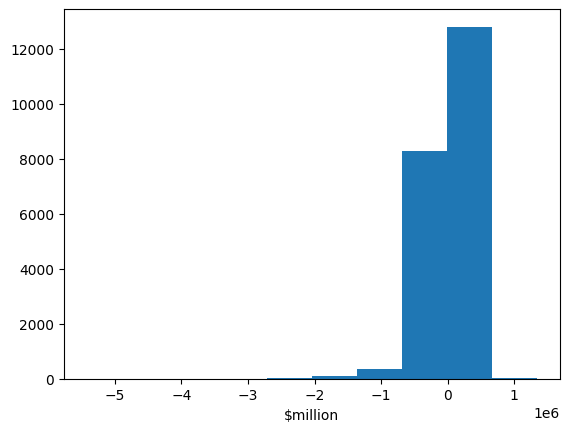

In [ ]:
plt.hist(res['error'])
plt.xlabel('$million')

Text(0.5, 0, '$million')

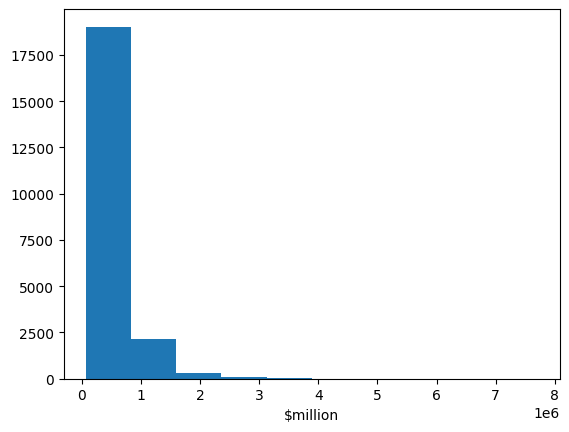

In [ ]:
plt.hist(df2['price'])
plt.xlabel('$million')

Text(0.5, 0, '#_of_bedrooms')

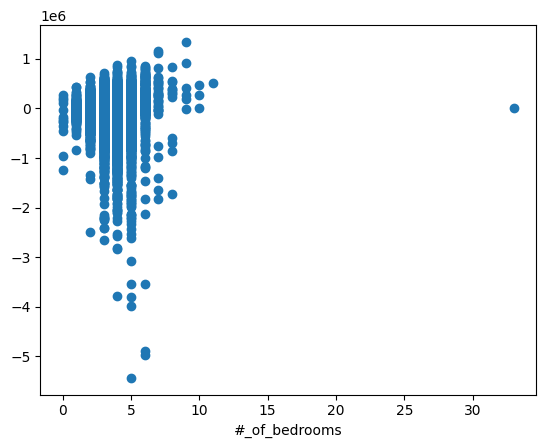

In [ ]:
plt.scatter(df2['bedrooms'], res['error'])
plt.xlabel('#_of_bedrooms')

Text(0.5, 0, '#_of_bathrooms')

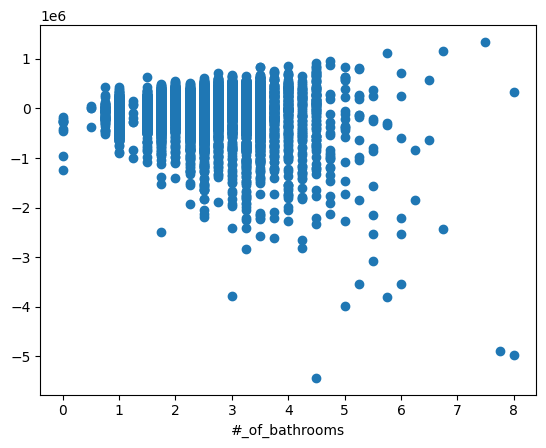

In [ ]:
plt.scatter(df2['bathrooms'], res['error'])
plt.xlabel('#_of_bathrooms')

Text(0.5, 0, 'sqft_living')

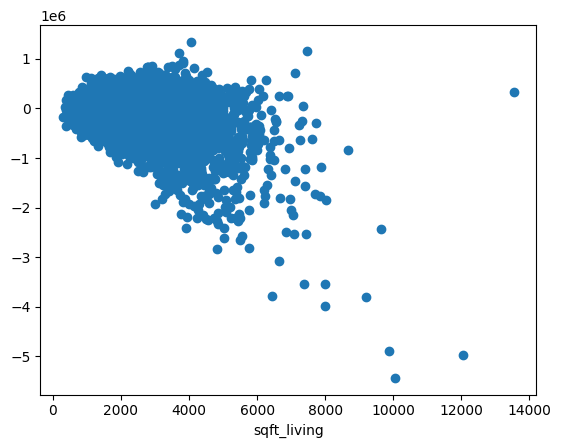

In [ ]:
plt.scatter(df2['sqft_living'], res['error'])
plt.xlabel('sqft_living')

In [ ]:
df2.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'view_0', 'view_1',
       'view_2', 'view_3', 'view_4', 'wf_0', 'wf_1', 'condition_1',
       'condition_2', 'condition_3', 'condition_4', 'condition_5', 'grade_1',
       'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8',
       'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13', 'year',
       'month'],
      dtype='object')

Text(0.5, 0, 'yr_built')

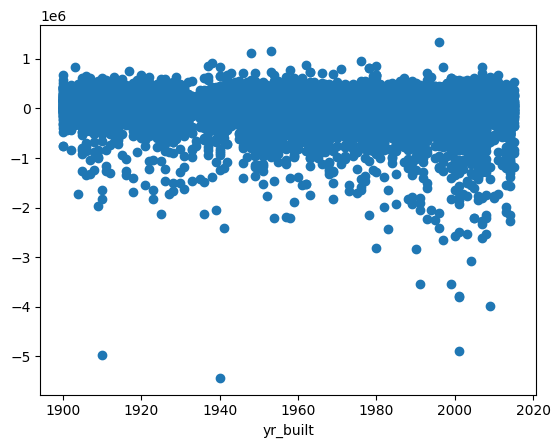

In [ ]:
plt.scatter(df2['yr_built'], res['error'])
plt.xlabel('yr_built')

ValueError: x and y must be the same size

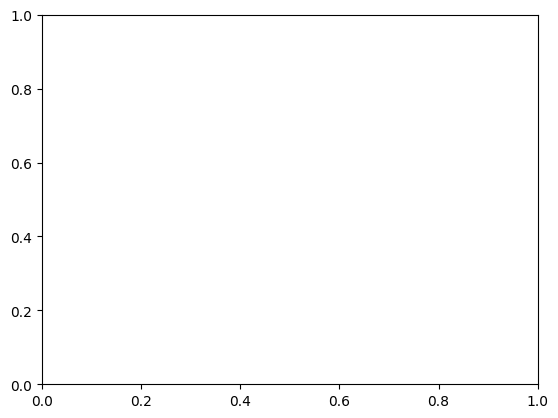

In [1383]:
filtered_df2 = df2[df2['yr_renovated'] != 0]
plt.scatter(filtered_df2['yr_renovated'], res['error'])


plt.scatter(df2['yr_built'], res['error'])
plt.xlabel('yr_built')

Text(0.5, 0, 'year')

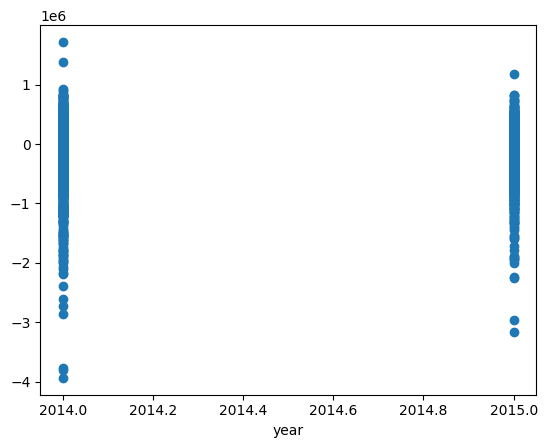

In [ ]:
plt.scatter(df2['year'], res['error'])
plt.xlabel('year')


Text(0.5, 0, 'month')

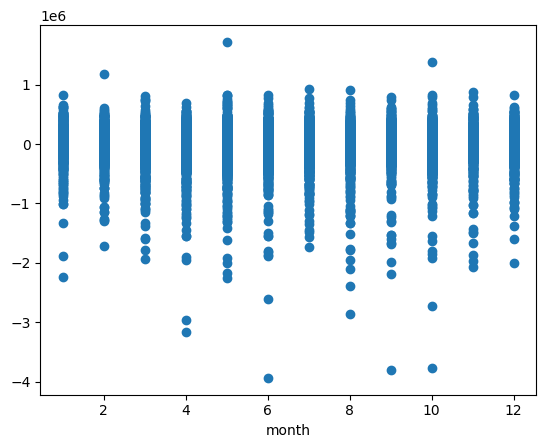

In [ ]:
plt.scatter(df2['month'], res['error'])
plt.xlabel('month')

Text(0.5, 0, 'lat')

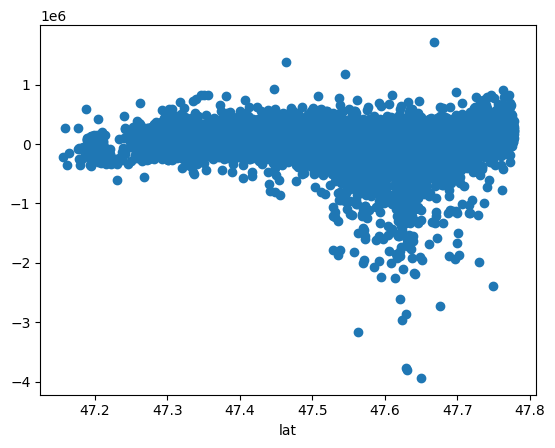

In [ ]:
plt.scatter(df2['lat'], res['error'])
plt.xlabel('lat')

Text(0.5, 0, 'long')

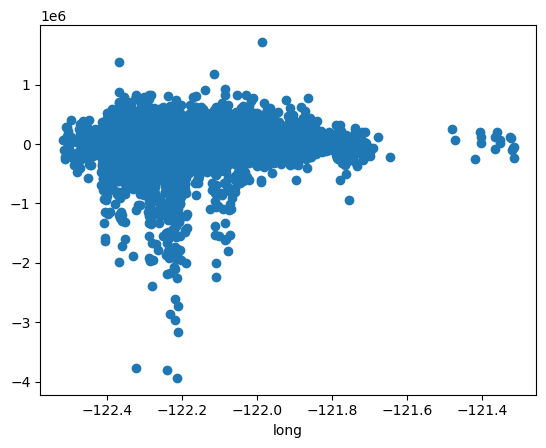

In [ ]:
plt.scatter(df2['long'], res['error'])
plt.xlabel('long')

((array([-3.99703558, -3.78181236, -3.66408326, ...,  3.66408326,
          3.78181236,  3.99703558]),
  array([-3934741.85307649, -3794502.70007702, -3771659.987779  , ...,
          1185326.44959756,  1379629.40458687,  1716732.69518053])),
 (204587.00419227377, -6.020551257250333e-07, 0.8959769209398376))

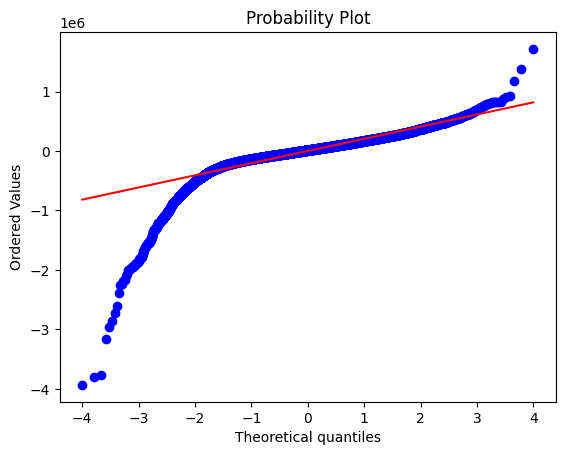

In [ ]:
import scipy. stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist ='norm', plot = ax)


In [ ]:
infl = result_model_ols.get_influence()
print(infl.summary_frame())

       dfb_Intercept  dfb_bedrooms  dfb_bathrooms  dfb_sqft_living  \
0           0.000052     -0.000086       0.000201         0.002356   
1           0.015656      0.006291       0.009135        -0.006675   
2           0.002464      0.004317      -0.000398         0.003343   
3          -0.003751      0.001190       0.006833        -0.002526   
4          -0.001046     -0.000511       0.001238        -0.000528   
...              ...           ...            ...              ...   
21608      -0.004572     -0.000187       0.000345         0.001145   
21609       0.003105     -0.003378       0.001766        -0.000034   
21610       0.008393     -0.002426      -0.019126         0.008602   
21611       0.000073     -0.000328       0.001025        -0.000332   
21612      -0.001644     -0.001557      -0.012176         0.005637   

       dfb_floors  dfb_sqft_above  dfb_sqft_basement  dfb_yr_built  \
0        0.000104       -0.002291          -0.001514     -0.000061   
1       -0.008663  

In [ ]:
infl.summary_frame()

,dfb_Intercept,dfb_bedrooms,dfb_bathrooms,dfb_sqft_living,dfb_floors,dfb_sqft_above,dfb_sqft_basement,dfb_yr_built,dfb_yr_renovated,dfb_lat,dfb_long,dfb_year,dfb_month,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.000052,-0.000086,0.000201,0.002356,0.000104,-0.002291,-0.001514,-0.000061,0.000010,0.000047,0.000059,-0.000046,-0.000190,1.886814e-08,-0.032403,0.000234,-0.000495,-0.032402,-0.000495
1,0.015656,0.006291,0.009135,-0.006675,-0.008663,-0.004076,-0.005718,-0.006504,-0.055004,-0.011137,0.005588,-0.014363,-0.023445,3.363894e-04,-1.748755,0.001428,-0.066129,-1.748838,-0.066132
2,0.002464,0.004317,-0.000398,0.003343,0.001243,-0.000933,0.002148,0.004454,0.001905,-0.007250,-0.003235,-0.002660,0.003097,2.211222e-05,-0.829174,0.000418,-0.016955,-0.829168,-0.016954
3,-0.003751,0.001190,0.006833,-0.002526,-0.003381,-0.004598,-0.000085,-0.000393,-0.001265,-0.001281,-0.003259,0.003391,0.006092,1.122806e-05,0.460173,0.000689,0.012082,0.460165,0.012081
4,-0.001046,-0.000511,0.001238,-0.000528,-0.003721,-0.000181,-0.003288,0.001523,0.000275,0.002286,0.002270,0.001254,-0.001363,4.181790e-06,0.384706,0.000367,0.007373,0.384699,0.007373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.004572,-0.000187,0.000345,0.001145,-0.007685,0.004763,-0.000937,-0.002236,0.000145,-0.002356,0.002355,0.005121,0.005016,1.218782e-05,-0.436427,0.000831,-0.012587,-0.436419,-0.012587
21609,0.003105,-0.003378,0.001766,-0.000034,0.000510,-0.001751,0.003796,-0.007146,-0.001103,0.000634,0.008179,-0.001889,0.002321,1.374068e-05,-0.613030,0.000475,-0.013365,-0.613022,-0.013365
21610,0.008393,-0.002426,-0.019126,0.008602,0.009877,-0.004530,0.007590,0.016971,0.003859,0.002782,-0.005862,-0.009711,-0.008424,6.509867e-05,1.010516,0.000828,0.029091,1.010517,0.029091
21611,0.000073,-0.000328,0.001025,-0.000332,0.000957,-0.002158,-0.000775,0.000337,-0.000014,0.000038,0.001335,0.000115,-0.001450,1.230469e-06,0.204463,0.000382,0.004000,0.204458,0.003999


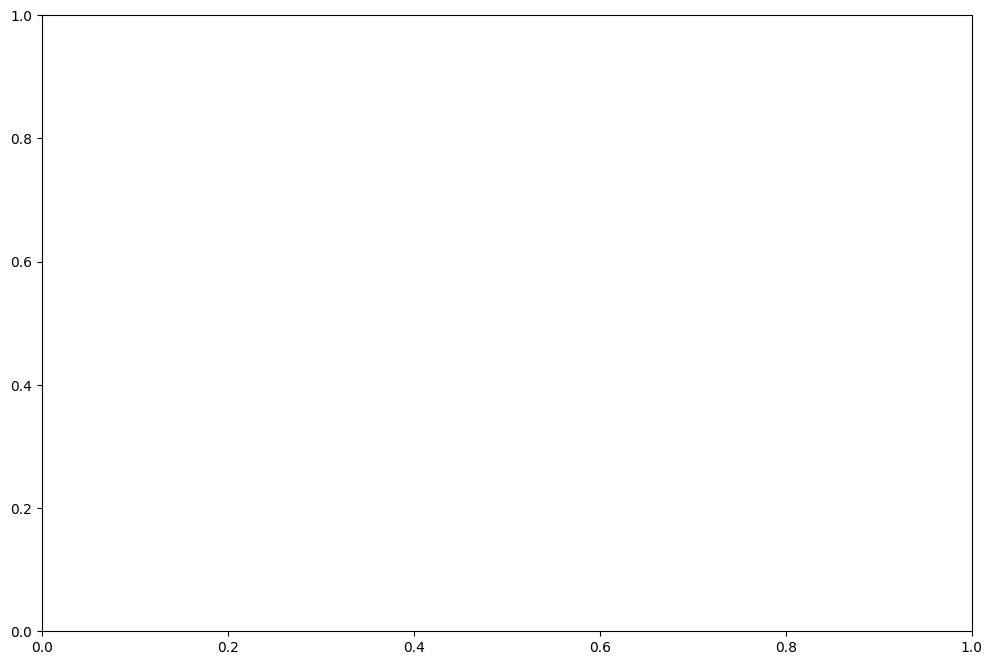

In [1384]:
fig. ax = plt.subplots(figsize = (12,8))
fig = sm.graphics.influence_plot(result_model_ols, ax=ax, criterion='cooks')

Feature engineering & build models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.impute import SimpleImputer
import numpy as np

In [ ]:
df2.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'view_0', 'view_1',
       'view_2', 'view_3', 'view_4', 'wf_0', 'wf_1', 'condition_1',
       'condition_2', 'condition_3', 'condition_4', 'condition_5', 'grade_1',
       'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8',
       'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13', 'year',
       'month'],
      dtype='object')

In [ ]:
# seperate features and target 
categorial_features = ['waterfront', 'view', 'condition','grade']
numerical_features = ['bedrooms','bathrooms', 'sqft_living','sqft_lot', 'floors', 'sqft_above','sqft_basement', 'yr_built', 'yr_renovated', 'lat','long','sqft_living15', 'sqft_lot15', 'year', 'month']
target = 'price'

In [ ]:
df2[['waterfront', 'view', 'condition','grade','bedrooms','bathrooms', 'sqft_living','sqft_lot', 'floors', 'sqft_above','sqft_basement', 'yr_built', 'yr_renovated', 'lat','long','sqft_living15', 'sqft_lot15', 'year', 'month']]

,waterfront,view,condition,grade,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,0,0,3,7,3,1.00,1180,5650,1.0,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,0,0,3,7,3,2.25,2570,7242,2.0,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,0,0,3,6,2,1.00,770,10000,1.0,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,0,0,5,7,4,3.00,1960,5000,1.0,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,0,0,3,8,3,2.00,1680,8080,1.0,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0,0,3,8,3,2.50,1530,1131,3.0,1530,0,2009,0,47.6993,-122.346,1530,1509,2014,5
21609,0,0,3,8,4,2.50,2310,5813,2.0,2310,0,2014,0,47.5107,-122.362,1830,7200,2015,2
21610,0,0,3,7,2,0.75,1020,1350,2.0,1020,0,2009,0,47.5944,-122.299,1020,2007,2014,6
21611,0,0,3,8,3,2.50,1600,2388,2.0,1600,0,2004,0,47.5345,-122.069,1410,1287,2015,1


In [ ]:
# split date in train/test
X_train, X_test, y_train, y_test = train_test_split(df2[categorial_features + numerical_features], df2[target], test_size =0.3, random_state =1234)
#define transformers
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps =[('scaler', StandardScaler())])
#building processor
preprocessor = ColumnTransformer(transformers=[('cat',cat_transformer, categorial_features),('num', num_transformer, numerical_features)])

In [ ]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'lat',
                                                   'long', 'sqft_living15',
                                                   'sqft_lot15', 'year',
                                                   'month'])])),
                ('regressor', LinearRegression())])

In [ ]:
pred = linear_regression.predict(X_test)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(pred, y_test))

391313023139627.7

In [ ]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor), 
    ('regressor', Ridge(alpha =3.0))
])


ridge_regression.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'lat',
                                                   'long', 'sqft_living15',
                                                   'sqft_lot15', 'year',
                                                   'month'])])),
                ('regressor', Ridge(alpha=3.0))])

In [ ]:
pred_ridge = ridge_regression.predict(X_test)
np.sqrt(mean_squared_error(pred_ridge, y_test))

192035.88280181054

In [ ]:
lasso_regression = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha = 1.0))
])

lasso_regression.fit(X_train, y_train)


C:\Users\mei88\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.222e+13, tolerance: 2.071e+11
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'lat',
                                                   'long', 'sqft_living15',
                                                   'sqft_lot15', 'year',
                                                   'month'])])),
                ('regressor', Lasso())])

In [ ]:
lasso_pred = lasso_regression.predict(X_test)
np.sqrt(mean_squared_error(lasso_pred, y_test))

192095.0850988766

In [ ]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio = 0.8))
])

elasticnet_regression.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'lat',
                                                   'long', 'sqft_living15',
                                                   'sqft_lot15', 'year',
                                                   'month'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [ ]:
elasticnet_pred = elasticnet_regression.predict(X_test)
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

214941.82868870185

In [ ]:
y_test

12432     485000.0
7793      358000.0
13435     716500.0
1821      367500.0
12449     544000.0
           ...    
2596     1065000.0
21161     459990.0
20133     388500.0
11130     530000.0
16762     449400.0
Name: price, Length: 6484, dtype: float64

In [ ]:
elastic_net_pred = pd.concat([pd.DataFrame(elasticnet_pred, columns = ['pred']),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)

In [ ]:
elasticnet_pred

array([460713.97497498, 521298.50257239, 941679.29624848, ...,
       551685.27648478, 526079.48639047, 590514.53657842])

In [ ]:
elasticnet_pred['res'] = elasticnet_pred['pred'] - elasticnet_pred['actual']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
X_test

,waterfront,view,condition,grade,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
12432,0,0,4,8,3,1.75,2030,10089,1.0,1330,700,1976,0,47.5217,-122.050,2030,9827,2015,3
7793,0,0,3,8,3,2.25,2510,12013,2.0,2510,0,1988,0,47.3473,-122.314,1870,8017,2015,1
13435,0,0,3,11,5,2.75,3630,38461,2.0,3630,0,2000,0,47.4289,-122.094,4440,50378,2014,10
1821,0,0,4,7,3,1.00,1660,11783,1.0,1160,500,1978,0,47.7563,-122.075,1320,10541,2014,6
12449,0,0,3,8,4,2.50,2030,3974,2.0,2030,0,1994,0,47.5692,-122.006,1780,3953,2014,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2596,0,0,3,8,2,1.75,1890,9466,2.0,1890,0,1987,0,47.6144,-122.211,2180,12825,2014,5
21161,0,0,3,8,3,2.50,2680,5539,2.0,2680,0,2013,0,47.4761,-121.734,2990,6037,2014,5
20133,0,0,3,8,4,2.50,2718,6197,2.0,2718,0,2006,0,47.3255,-122.164,2667,5000,2015,4
11130,0,0,4,8,3,1.75,1980,6760,1.0,1980,0,1973,0,47.6398,-122.113,2120,7280,2014,5


In [ ]:
plt.scatter(X_test['bedrooms'], elastic_net_pred['res'])

KeyError: 'res'